--- Logistic Regression ---
Accuracy: 0.7426666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79      1793
           1       0.70      0.62      0.66      1207

    accuracy                           0.74      3000
   macro avg       0.73      0.72      0.73      3000
weighted avg       0.74      0.74      0.74      3000

Confusion Matrix:
 [[1475  318]
 [ 454  753]]


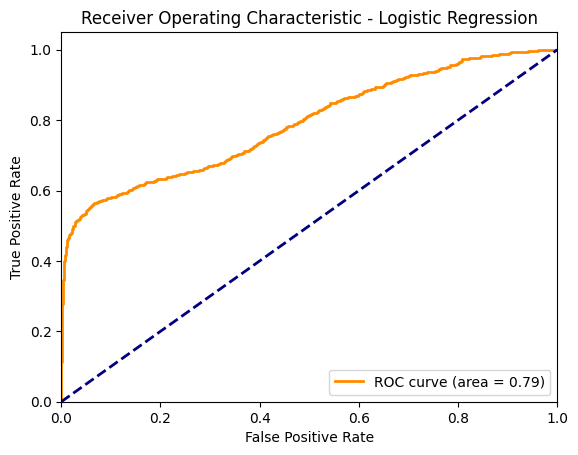

--- Decision Tree ---
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1793
           1       0.96      0.97      0.96      1207

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000

Confusion Matrix:
 [[1738   55]
 [  35 1172]]


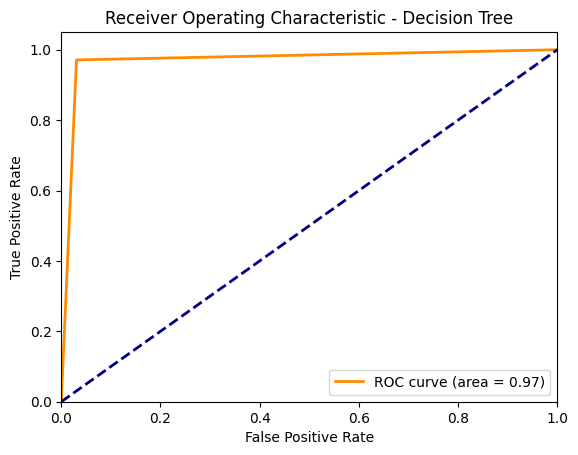

--- K-Nearest Neighbors ---
Accuracy: 0.7836666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1793
           1       0.74      0.72      0.73      1207

    accuracy                           0.78      3000
   macro avg       0.78      0.77      0.77      3000
weighted avg       0.78      0.78      0.78      3000

Confusion Matrix:
 [[1482  311]
 [ 338  869]]


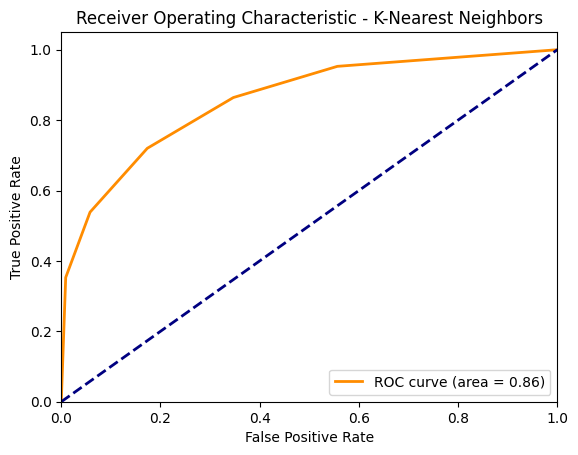

--- Naive Bayes ---
Accuracy: 0.739
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77      1793
           1       0.65      0.75      0.70      1207

    accuracy                           0.74      3000
   macro avg       0.73      0.74      0.73      3000
weighted avg       0.75      0.74      0.74      3000

Confusion Matrix:
 [[1315  478]
 [ 305  902]]


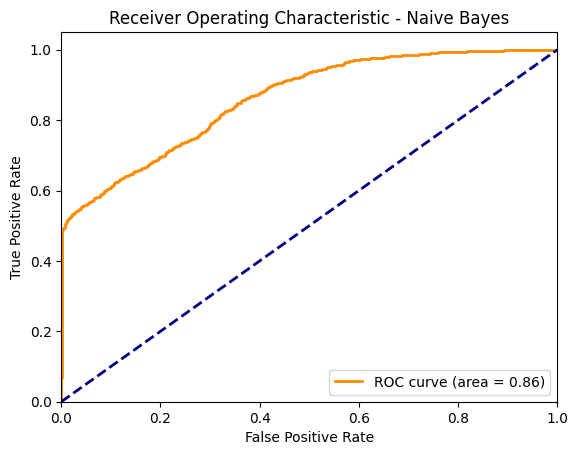

--- Support Vector Machine ---
Accuracy: 0.6556666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.61      0.68      1793
           1       0.56      0.72      0.63      1207

    accuracy                           0.66      3000
   macro avg       0.66      0.67      0.65      3000
weighted avg       0.68      0.66      0.66      3000

Confusion Matrix:
 [[1099  694]
 [ 339  868]]


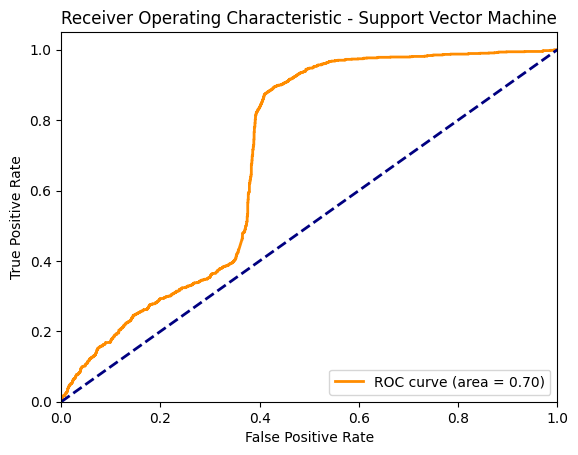

--- Random Forest ---
Accuracy: 0.985
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1793
           1       0.99      0.97      0.98      1207

    accuracy                           0.98      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.98      0.98      3000

Confusion Matrix:
 [[1786    7]
 [  38 1169]]


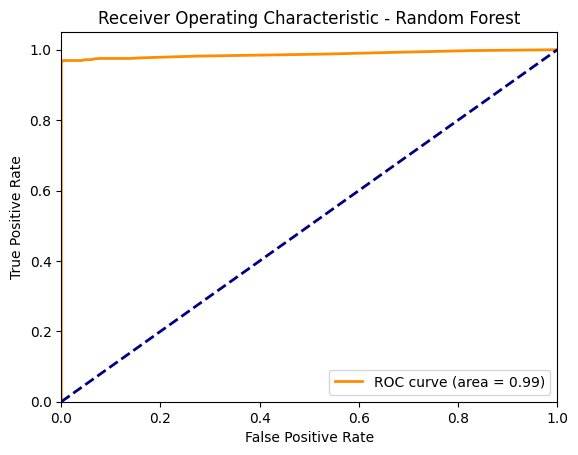

--- Gradient Boosted Trees ---
Accuracy: 0.987
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1793
           1       1.00      0.97      0.98      1207

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix:
 [[1792    1]
 [  38 1169]]


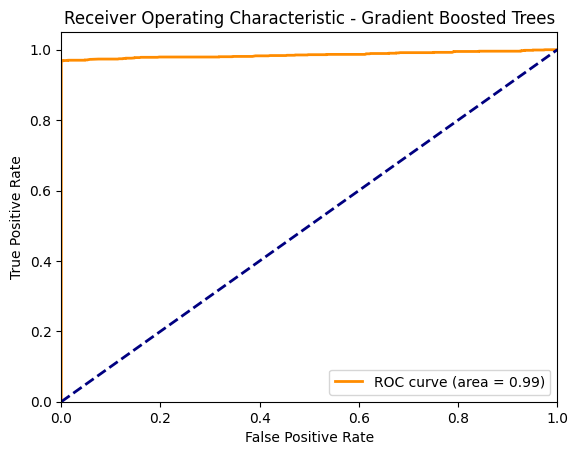

--- Neural Network ---
Accuracy: 0.946
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      1793
           1       0.99      0.88      0.93      1207

    accuracy                           0.95      3000
   macro avg       0.95      0.93      0.94      3000
weighted avg       0.95      0.95      0.95      3000

Confusion Matrix:
 [[1778   15]
 [ 147 1060]]


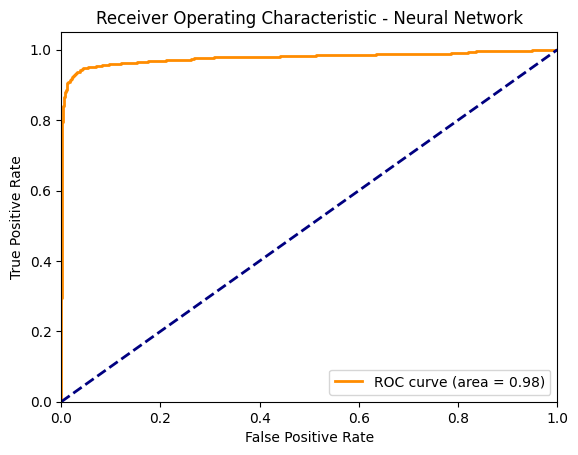


 Summary of ROC Scores
               Classifier  AUC Score
5           Random Forest   0.987038
6  Gradient Boosted Trees   0.985405
7          Neural Network   0.977432
1           Decision Tree   0.970164
3             Naive Bayes   0.861012
2     K-Nearest Neighbors   0.856907
0     Logistic Regression   0.790688
4  Support Vector Machine   0.696872

 Predictions for New Voters
   Age  HomeOwner  Female  Married  HouseholdSize  Income  Education  Church  \
0   30          1       1        1              7    79.0         15       1   
1   65          1       1        0              1   111.0         20       1   
2   37          0       0        1              2   114.0         18       1   
3   47          1       1        1              5    96.0         15       0   
4   31          1       0        1              6   151.0         15       0   

   Logistic Regression  Decision Tree  K-Nearest Neighbors  Naive Bayes  \
0                    1              1                    1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# Load training data
voters = pd.read_csv('Voters.csv')

# Feature selection
features = ['Age', 'HomeOwner', 'Female', 'Married', 'HouseholdSize', 'Income', 'Education', 'Church']
X = voters[features]
y = voters['Undecided']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=0, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(probability=True, random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'Gradient Boosted Trees': GradientBoostingClassifier(random_state=0),
    'Neural Network': MLPClassifier(random_state=1, max_iter=1000)
}

# Dictionary to hold AUC values
auc_scores = {}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict the test set results
    y_pred = clf.predict(X_test)
    y_scores = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test)

    # Output evaluation metrics
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    auc_scores[name] = roc_auc

    # Plotting the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {name}')
    plt.legend(loc="lower right")
    plt.show()

print("\n Summary of ROC Scores")
# Create DataFrame from AUC scores and sort by AUC Score descending
auc_df = pd.DataFrame(list(auc_scores.items()), columns=['Classifier', 'AUC Score'])
auc_df = auc_df.sort_values(by='AUC Score', ascending=False)
print(auc_df)

print("\n Predictions for New Voters")
# Load new voters data
new_voters = pd.read_csv('NewVoters.csv')
X_new = new_voters[features]

# Predict using each classifier
predictions = {name: clf.predict(X_new) for name, clf in classifiers.items()}

# Create DataFrame of predictions
predictions_df = pd.DataFrame(predictions)

# Concatenate the original new voters data with the predictions
final_df = pd.concat([new_voters, predictions_df], axis=1)

# Save predictions and original data to CSV
final_df.to_csv('Predictions.csv', index=False)

print(final_df.head())  # Print first few rows of the final DataFrame